# 《统计方法与机器学习》实践作业3

10211900416 郭夏辉

## D-Day：Oct. 25

## Q1: (必做题目)

按以下步骤实现一个模拟实验：

1.构造一个特征值矩阵$\mathbf{X}=(x_{ij})_{n\times(p+1)}$，即
$$
\mathbf{X} = \begin{pmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1p}\\
1 & x_{21} & x_{22} & \ldots & x_{2p}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & x_{n1} & x_{n2} & \ldots & x_{np}\\
\end{pmatrix}=\begin{pmatrix}
1 & \mathbf{X_{1}^T}\\
1 & \mathbf{X_{2}^T}\\
\vdots & \vdots\\
1 & \mathbf{X_{n}^T}\\
\end{pmatrix}
$$
其中$\mathbf{X_{1}^T},\mathbf{X_{2}^T},\ldots,\mathbf{X_{n}^T}$是独立同分布的$p$维随机向量，且服从多元正态分布。具体来说，
$$\mathbf{X_{i}}\sim N_p(\mathbf{0_p},\sigma^2\mathbf{I_p})$$
这里$\mathbf{I_p}$是单位阵。

2.构造响应变量$$\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}$$其中$$\beta = (\mathbf{1_{1+p_1}^T},\mathbf{0_{p-p_1}^T})^T$$
特别说明一下，这样构造的$\beta$使得$\mathbf{X}$中的前$(p_1+1)$列的特征（包括常数项）对因变量有影响。同时，误差向量$$\mathbf{\epsilon} = (\epsilon_1,\epsilon_2,\ldots,\epsilon_n)^T$$其中$$\epsilon_i \overset{i.i.d}\sim N(0,\sigma_{\epsilon}^2),i=1,2,\ldots,n$$
3.给定$\mathbf{x_0}=(1,\mathbf{0.05_{20}^T})^T$，$y_0=\mathbf{x_0}^T\beta+\epsilon_0$的最佳点预测值为$\mathbf{x_0}^T\beta$。这里是真实的参数$\beta$。

4.给定训练数据$\mathbf{y}$和$\mathbf{X}$，建立第$k$个模型，即$$y=\beta_{0}+\beta_{1}x_{1}+...+\beta_{k}x_{k}+\epsilon$$
于是，我们可以得到其相应的最小二乘估计

$$\hat{\beta^{(k)}}=(\hat{\beta_0},\hat{\beta_1},\ldots,\hat{\beta_k},\mathbf{0_{20-k}^T})^T$$

由此，$y_0$的预测值为$$\hat{y_0^{(k)}}=\mathbf{x_0^T}\hat{\beta^{(k)}}$$这里是所得到的估计值$\hat{\beta^{(k)}}$。


5.重复1-4步$M$次，可以得到$M$个不同的观测值，分别记为$\hat{y_{0,m}^{(k)}},k=1,2,\ldots,p;m=1,2,\ldots,M$。于是，可以计算其偏差平方、方差和均方误差，即
$$Biass_k^2=(M^{-1}\sum_{m=1}^M\hat{y_{0,m}^{(k)}}-\mathbf{x_0^T}\beta)^2$$
$$Var_k = M^{-1}\sum_{m=1}^M(\hat{y_{0,m}^{(k)}}-M^{-1}\sum_{m=1}^M\hat{y_{0,m}^{(k)}})^2$$
$$MSE_k = M^{-1}\sum_{m=1}^M(\hat{y_{0,m}^{(k)}}-\mathbf{x_0^T}\beta)^2$$

- 取值:

$$\sigma^2=0.2^2$$
$$\sigma_{\epsilon}^2=3^2$$
$$M=5000$$
$$p=20$$
$$p_1=10$$

- 任务:

1. 绘制一张图片（以k作为横坐标），偏差平方、方差以及均方误差这三条曲线；

2. 基于所绘制的图象，请评述，模型的欠拟合和过拟合分别对预测结果造成怎样的影响？

## Q2: (选做题目)

阅读《Reconciling modern machine-learning practice and the classical Biass–variance trade-off》复现论文中图2至图4。

## Q1 随机模拟

### 1. 绘制一张图片（以k作为横坐标），偏差平方、方差以及均方误差这三条曲线；

导入必要的库，并且定义整个实验中重要的量。

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
n = 100 # 样本量，这个是我自己取的
sigmax = 0.2 # 自变量标准差
sigmay = 3 # 随机误差标准差
M = 5000 # 重复数量
p = 20 # 特征数量
p1 = 10 # 被选取特征数量
x0 = [1 if i == 0 else 0.05 for i in range(p + 1)]
beta = np.mat([1 if i <= p1 else 0 for i in range(p + 1)]).T

In [4]:
y0estimate = np.matmul(x0, beta)
Bias = [[] for _ in range(p + 1)]
y0hats = [[] for _ in range(p + 1)]

生成$X$和$y$

其中eps是生成的误差向量$\epsilon$

对于每重循环，利用 $\hat{\pmb{\beta}}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\pmb{y}$ 能得到它的值。

然后 $\hat{y_0}^{(k)}=\pmb{x_0}'\hat{\pmb{\beta}}^{(k)}$ 可解得 $y0$ 的估计值。

最后把它和 $\hat{y_0}^{(k)}-\pmb{x}_0'\pmb{\beta}$ 一起记录到列表中即可。


In [5]:
# 生成X和y
def eps(n):
    return np.mat([np.random.normal(0,sigmay) for _ in range(n)]).T

def Xandy(beta, n): # 生成 X 和 y
    X = []
    for _ in range(n):
        xi = [np.random.normal(0,sigmax) for _ in range(p + 1)]
        xi[0] = 1.0 # X第一列全1
        X.append(xi)
    X = np.mat(X)
    y = np.matmul(X, beta) + eps(n)
    return y, X

for m in range(M):
    y, X = Xandy(beta,  n)
    re = np.matmul(X.T,X).I
    beta_hat = np.matmul(np.matmul(re,X.T),y)
    beta_hat_k = beta_hat
    for k in range(p+1):
        y0hat = np.matmul(x0, beta_hat_k)
        bi = float(y0hat - y0estimate)
        Bias[p - k].append(bi)
        y0hats[p - k].append(float(y0hat))
        beta_hat_k[p - k] = 0

接下来计算出$Biass^2_k,\ Var_k,\ MSE_k$

$$Biass_k^2=(M^{-1}\sum_{m=1}^M\hat{y_{0,m}^{(k)}}-\mathbf{x_0^T}\beta)^2$$

$$Var_k = M^{-1}\sum_{m=1}^M(\hat{y_{0,m}^{(k)}}-M^{-1}\sum_{m=1}^M\hat{y_{0,m}^{(k)}})^2$$

$$MSE_k = M^{-1}\sum_{m=1}^M(\hat{y_{0,m}^{(k)}}-\mathbf{x_0^T}\beta)^2$$

注意到 $Var_k + Biass_k^2 = MSE_k  $

In [6]:
Biass = []
Mses = []
for i in range(p + 1):
    y0hati = np.array(y0hats[i])
    bis = np.array(Bias[i])
    Biassk = float(y0hati.mean() - y0estimate)
    Biass.append(Biassk * Biassk)
    
    mse = bis * bis
    Mses.append(mse.mean())

'''
print("MSE:")
for i in range(p + 1):
    print(i, ':', round(Mses[i], 3))
'''

'\nprint("MSE:")\nfor i in range(p + 1):\n    print(i, \':\', round(Mses[i], 3))\n'

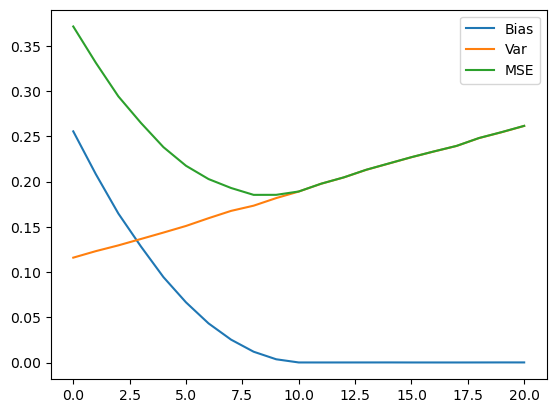

In [7]:
T = np.array([x for x in range(p+1)])
l1 = np.array(Biass)
l3 = np.array(Mses)
l2 = l3 - l1

plt.plot(T, l1, label="Bias")
plt.plot(T, l2, label="Var")
plt.plot(T, l3, label="MSE")
plt.legend()
plt.show()

### 2. 基于所绘制的图象，请评述，模型的欠拟合和过拟合分别对预测结果造成怎样的影响？

首先，基于数学上的推导(这里省略了)，我们可以得到数值上的结论：$Var + Biass = MSE  $ (方差 + 偏差平方 = 均方误差)

然后根据绘制的图像来评述：

1. 均方误差随着变量数量的增大先减小后增大，在大概 k=10 时候取最小值。而且，随着k的增大，方差增大、偏差平方减小。同时 k = 10也是选择的参数数量和原有参数恰好相等的点，拟合地最好，既不过拟合又不欠拟合。

2. 如果选择的变量太少(k<10),方差较小、偏差平方较大(模型准确率较低),欠拟合情况发生

3. 如果选择的变量太多(k>10),偏差平方较小(趋于0，甚至可以不予考虑), 但是方差较大(模型较为复杂，会因为数据的改变而发生更大的变化，泛化能力差),过拟合情况发生

